In [1]:
%load_ext autoreload
%autoreload 2
%cd ~/PonyPricer/
%matplotlib inline
#%run cleandata.py

import re
import math
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model
from sklearn import isotonic
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from model import *

/Users/jbrosamer/PonyPricer


/Users/jbrosamer/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Feature ranking:
breed 1. feature 4 (0.132021)
age 2. feature 0 (0.113457)
inches 3. feature 2 (0.070592)
color 4. feature 3 (0.024961)
Dressage 5. feature 53 (0.020767)
gender 6. feature 1 (0.018864)
trail 7. feature 38 (0.016058)
amateur 8. feature 30 (0.015857)
level 9. feature 44 (0.012222)
compet 10. feature 22 (0.012115)
broke 11. feature 40 (0.011970)
riding 12. feature 24 (0.011302)
Barrel Racing 13. feature 109 (0.011095)
Trail Riding, Recreational 14. feature 68 (0.010863)
video 15. feature 11 (0.010637)
champion 16. feature 31 (0.010077)
Cutting 17. feature 57 (0.009581)
Broodmare 18. feature 55 (0.009580)
shown 19. feature 16 (0.009383)
western 20. feature 39 (0.008690)
jump 21. feature 8 (0.008622)
saddle 22. feature 7 (0.008184)
Jumping 23. feature 90 (0.008154)
All Around 24. feature 54 (0.008060)
world 25. feature 42 (0.007824)
Western Riding 26. feature 59 (0.007811)
Reining 27. feature 83 (0.007671)
hunt 28. feature 46 (0.007097)
NRHA Futurity-Derby Nominated 29. feat

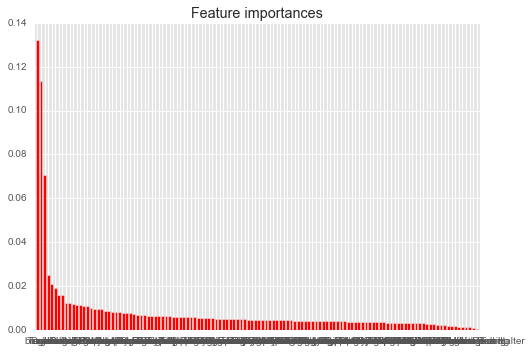

In [4]:
from model import *
gbr=b.makeModel()
b.plotFeatures()

df.columns Index([u'id', u'breed', u'price', u'color', u'age', u'zip', u'temp',
       u'warmblood', u'sold', u'soldhere',
       ...
       u'Pack Horse', u'Draft', u'Sporthorse', u'HYPP N-H',
       u'Champion Pedigree', u'Schoolmaster', u'Mounted Games',
       u'Team Penning', u'Endurance Riding', u'lenDesc'],
      dtype='object', length=138)
Final cols ['age', 'gender', 'inches', 'color', 'breed', 'logprice']
Score 0.31616640395
Score 0.318253007939
Abs Median Error: 247105.121452
Abs Percent Error: 0.517330130945
Mean RMSE: 835763.106492
R2 0.317209705944
Starting
going to plot


(<matplotlib.figure.Figure at 0x108c740d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109b87750>)

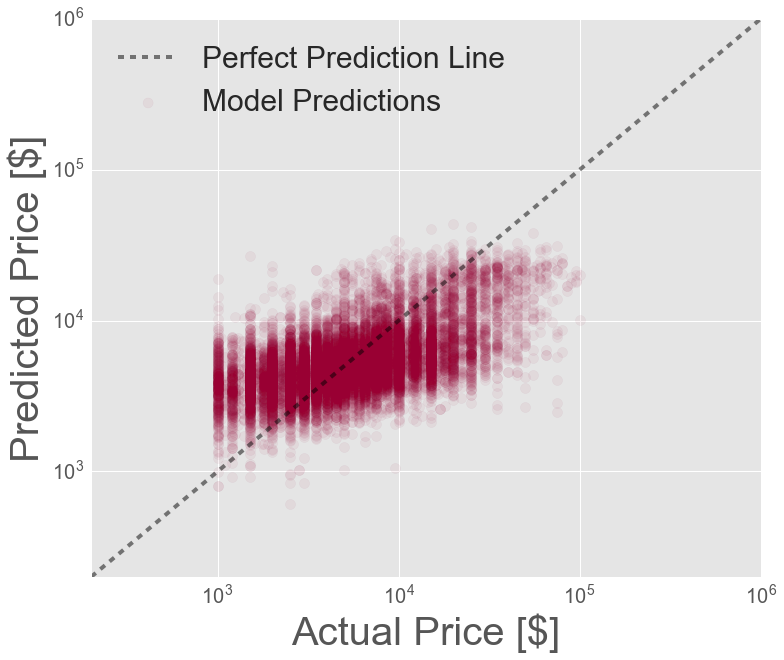

In [4]:
from model import *
df_test = all_data()
df = df_test.copy()
df = clean_col(df)
df = encode(df)
b = Model(df)
b.split()
b.kfold_cv(n_folds=2)
b.plot_results()
#df=b.cross_val_cols()

Line fit m:0.498884 b:4.299260


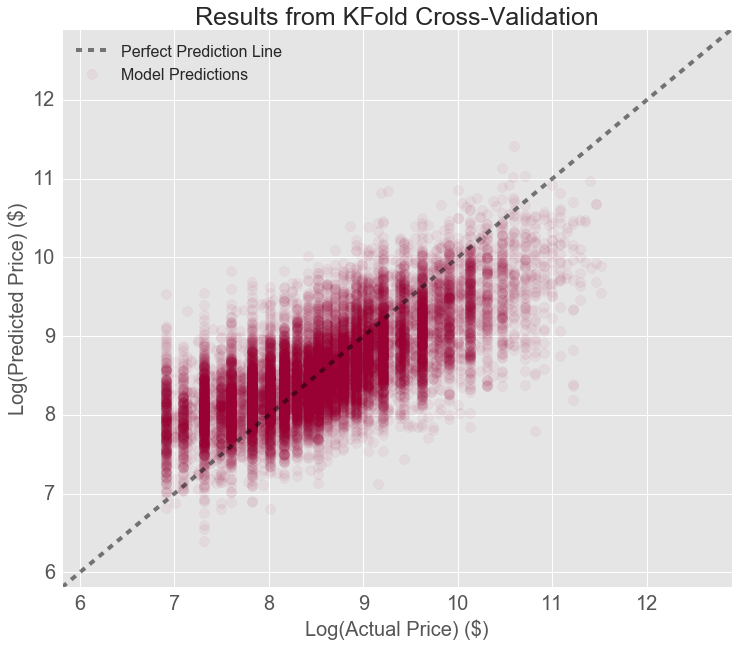

In [14]:
b.plot_results()

features [ 4  0  2  3 53  1 38 30]
FeatureNames ['age', 'gender', 'inches', 'color', 'breed', 'prospect', 'sire', 'saddle', 'jump', 'owner', 'selling', 'video', 'ready', 'event', 'vices', 'clips', 'shown', 'dressage', 'pictures', 'filly', 'novice', 'showmanship', 'compet', 'easy', 'riding', 'ground', 'rides', 'rider', 'nice', 'used', 'amateur', 'champion', 'mare', 'registered', 'safe', 'stallion', 'needs', 'ridden', 'trail', 'western', 'broke', 'import', 'world', 'years', 'level', 'ride', 'hunt', 'youtube', 'quiet', 'youth', 'points', 'pleasure', 'shows', 'Dressage', 'All Around', 'Broodmare', 'Racing', 'Cutting', 'Eventing', 'Western Riding', 'English Pleasure', 'Horsemanship', 'Hunter', 'Money Winner', 'Superior Award', 'Western Pleasure', 'Ridden English', 'Advanced Rider Recommended', 'Trail Riding, Recreational', 'Intermediate Rider Recommended', 'Pole Bending', 'Champion', 'Ranch Versatility', 'NRHA Futurity-Derby Nominated', 'Broodmare Only', 'Baroque Horse', 'Ranch Work', 'Yout

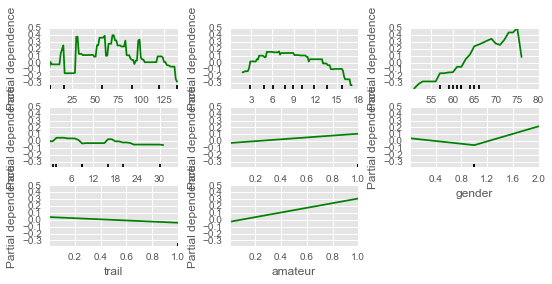

In [5]:
b.plotPartial(8)


In [6]:

features=final_cols[:-1]
medians=list()
means=list()
pf=predCVDataframe()
gpDict=dict()
for f in features:
    gpBy=pf.groupby(pf[f])['perDiff'].median().sort_values(ascending=False)
    gpDict[f]=gpBy

df.columns Index([u'id', u'breed', u'price', u'color', u'age', u'zip', u'temp',
       u'warmblood', u'sold', u'soldhere',
       ...
       u'Vaulting', u'Weanling', u'Western Dressage', u'Western Pleasure',
       u'Western Riding', u'Wife-Safe Horse', u'Working Equitation',
       u'Yearling', u'Youth', u'lenDesc'],
      dtype='object', length=275)
Final cols ['age', 'gender', 'inches', 'color', 'breed', 'prospect', 'sire', 'saddle', 'jump', 'owner', 'selling', 'video', 'ready', 'event', 'vices', 'clips', 'shown', 'dressage', 'pictures', 'filly', 'novice', 'showmanship', 'compet', 'easy', 'riding', 'ground', 'rides', 'rider', 'nice', 'used', 'amateur', 'champion', 'mare', 'registered', 'safe', 'stallion', 'needs', 'ridden', 'trail', 'western', 'broke', 'import', 'world', 'years', 'level', 'ride', 'hunt', 'youtube', 'quiet', 'youth', 'points', 'pleasure', 'shows', 'Dressage', 'All Around', 'Broodmare', 'Racing', 'Cutting', 'Eventing', 'Western Riding', 'English Pleasure', 'Horsemans

In [7]:
gpDict['breedGroup']

KeyError: 'breedGroup'

In [ ]:
plt.style.use('ggplot')
df = df_test.copy()
df = clean_col(df)
idx = df.loc[df['price']>100000,:].index
#df = df.drop(idx, axis = 0)
df_temp = df[['age','inches', 'gender', 'lnprice']]
plot = sns.pairplot(df_temp, hue = 'gender', diag_kind='kde')